# Flambagem de Placas

## Equação diferencial para flambagem

In [2]:
var('x y D Nx')
assume(D > 0)
assume(Nx > 0)
w = function('w')
pde = diff(w(x,y), x, 4) + 2*diff(w(x,y), x, x, y, y) + diff(w(x,y), y, 4) + Nx*diff(w(x,y), x, 2)/D == 0
html(pde)

<script type="math/tex">\frac{\mathit{Nx} \frac{\partial^{2}}{(\partial x)^{2}}w\left(x, y\right)}{D} + \frac{\partial^{4}}{(\partial x)^{4}}w\left(x, y\right) + 2 \, \frac{\partial^{4}}{(\partial x)^{2}(\partial y)^{2}}w\left(x, y\right) + \frac{\partial^{4}}{(\partial y)^{4}}w\left(x, y\right) = 0</script>

In [45]:
var('E t nu')
assume(E > 0, t > 0, 1 > nu > 0)
eq1 = D == E*t^3/(12*(1-nu^2))
html(eq1)

<script type="math/tex">D = -\frac{E t^{3}}{12 \, {\left(\nu^{2} - 1\right)}}</script>

## Aproximação de Navier

In [4]:
var('A a b m n')
assume(A > 0, a > 0, b > 0)
assume(m, n, "integer")
assume(m > 0, n > 0)
f_sol(x,y) = A*sin(m*pi*x/a)*sin(n*pi*y/b)
html(f_sol)

<script type="math/tex">\left( x, y \right) \ {\mapsto} \ A \sin\left(\frac{\pi m x}{a}\right) \sin\left(\frac{\pi n y}{b}\right)</script>

In [5]:
eq = pde.substitute_function(w, f_sol)
html(eq)

<script type="math/tex">\frac{\pi^{4} A m^{4} \sin\left(\frac{\pi m x}{a}\right) \sin\left(\frac{\pi n y}{b}\right)}{a^{4}} + \frac{2 \, \pi^{4} A m^{2} n^{2} \sin\left(\frac{\pi m x}{a}\right) \sin\left(\frac{\pi n y}{b}\right)}{a^{2} b^{2}} + \frac{\pi^{4} A n^{4} \sin\left(\frac{\pi m x}{a}\right) \sin\left(\frac{\pi n y}{b}\right)}{b^{4}} - \frac{\pi^{2} A \mathit{Nx} m^{2} \sin\left(\frac{\pi m x}{a}\right) \sin\left(\frac{\pi n y}{b}\right)}{D a^{2}} = 0</script>

## Carga crítica

In [21]:
N_cr = eq.solve(Nx)[0]
html(N_cr.factor())

<script type="math/tex">\mathit{Nx} = \frac{\pi^{2} {\left(b^{2} m^{2} + a^{2} n^{2}\right)}^{2} D}{a^{2} b^{4} m^{2}}</script>

In [22]:
N_cr = N_cr.subs(n = 1).factor()
html(N_cr)

<script type="math/tex">\mathit{Nx} = \frac{\pi^{2} {\left(b^{2} m^{2} + a^{2}\right)}^{2} D}{a^{2} b^{4} m^{2}}</script>

In [23]:
var('k')
N_cr_k = (pi^2*D/b^2)*k
k = (m*b/a + a/m/b)^2
html(N_cr_k)

<script type="math/tex">\frac{\pi^{2} D k}{b^{2}}</script>

In [24]:
html(k)

<script type="math/tex">{\left(\frac{b m}{a} + \frac{a}{b m}\right)}^{2}</script>

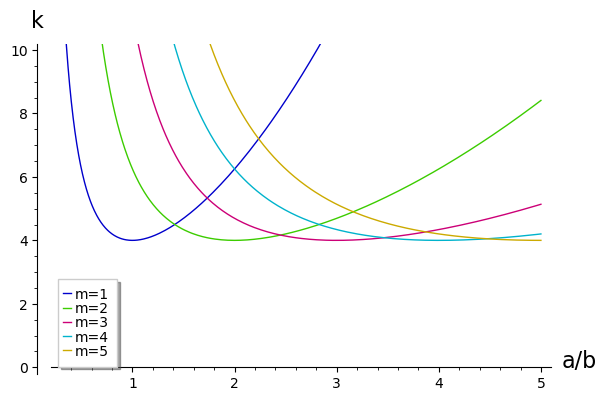

In [73]:
var('x_p')
assume(x_p > 0)
fs = []
for m_i in range(1,6):
    f(x_p) = k.subs(a = x_p*b, m = m_i)
    fs.append(f)
    
plot(fs, detect_poles=True, xmin=0.3, xmax=5, ymax=10, ymin=0, axes_labels=['a/b', 'k'],
     legend_label=['m=1', 'm=2', 'm=3', 'm=4', 'm=5'])

In [75]:
intersept = [0]
for i in range(4):
    s = solve(fs[i] == fs[i+1], x_p)[-1]
    intersept.append(s.rhs())
intersept.append(5)
intersept

[0, sqrt(2), sqrt(3)*sqrt(2), 2*sqrt(3), 2*sqrt(5), 5]

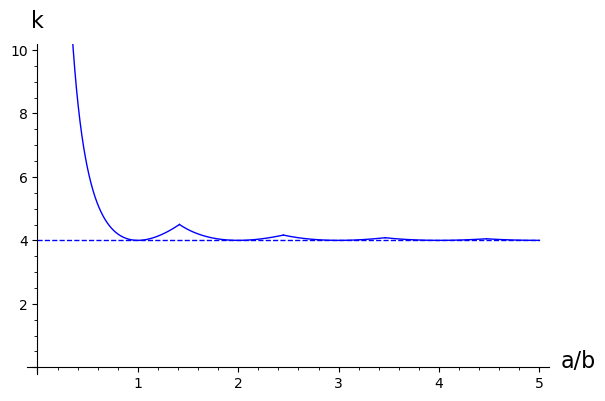

In [78]:
p = plot([], xmin=0.3, xmax=5, ymax=10, ymin=0, axes_labels=['a/b', 'k'])
for i in range(5):
    p += plot(fs[i], (x_p, intersept[i], intersept[i+1]))
p += line([(0,4),(5,4)], linestyle='--')
p

## Tensão

In [80]:
html(sigma_cr == N_cr.lhs()/t)

<script type="math/tex">\sigma_{\mathit{cr}} = \frac{\mathit{Nx}}{t}</script>

Para $a/b$ pequeno

In [37]:
var('sigma_cr')
sigma_cr_1 = sigma_cr == N_cr_k.subs(eq1, k=(b/a)^2, m = 1)/t
html(sigma_cr_1)

<script type="math/tex">\sigma_{\mathit{cr}} = -\frac{\pi^{2} E t^{2}}{12 \, {\left(\nu^{2} - 1\right)} a^{2}}</script>

Para $a/b > 3$

In [44]:
sigma_cr_2 = sigma_cr == N_cr_k.subs(eq1, k=4)/t
html(sigma_cr_2)

<script type="math/tex">\sigma_{\mathit{cr}} = -\frac{\pi^{2} E t^{2}}{3 \, {\left(\nu^{2} - 1\right)} b^{2}}</script>